# 06wk-2: 막대그래프, 심슨의 역설 (1)

최규빈  
2023-10-11

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/06wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-z-Kqi6kdDdz-IDDrjJm-6X&si=10ts9i0Q_xf9DG2U>

# 2. Imports

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# 3. 비교를 위한 시각화

## A. `geom_col()`

`-` 예시1: 기본적인 막대그래프

In [2]:
df = pd.DataFrame({'x':[0,1],'y':[40,60]})
df

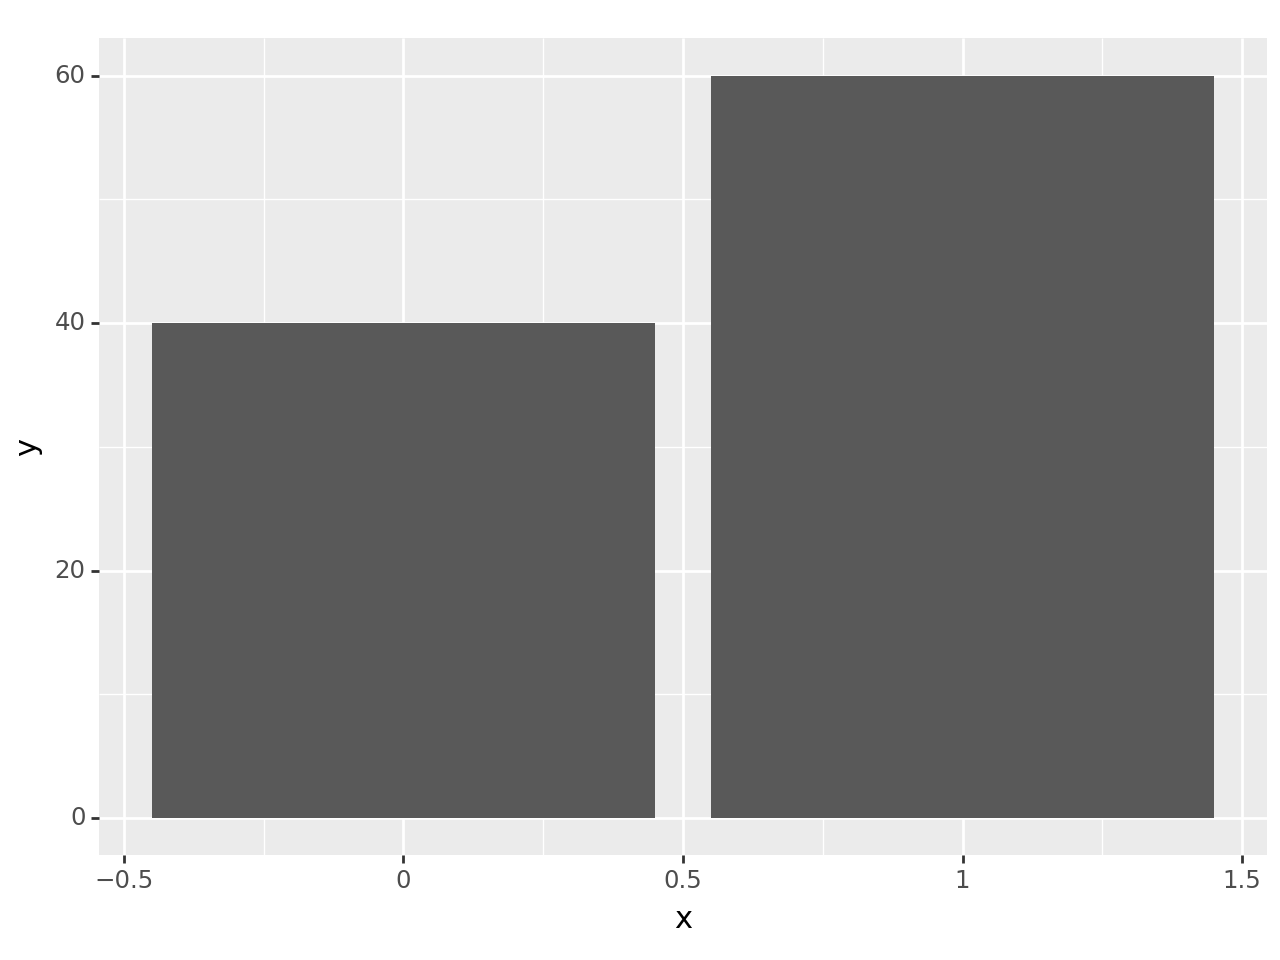

In [3]:
fig = ggplot(df)
col = geom_col(aes(x='x',y='y'))
fig + col

`-` 예시2: $x$축이 범주인 경우

In [4]:
df = pd.DataFrame({'sex':['male','female'],'score':[40,60]})
df

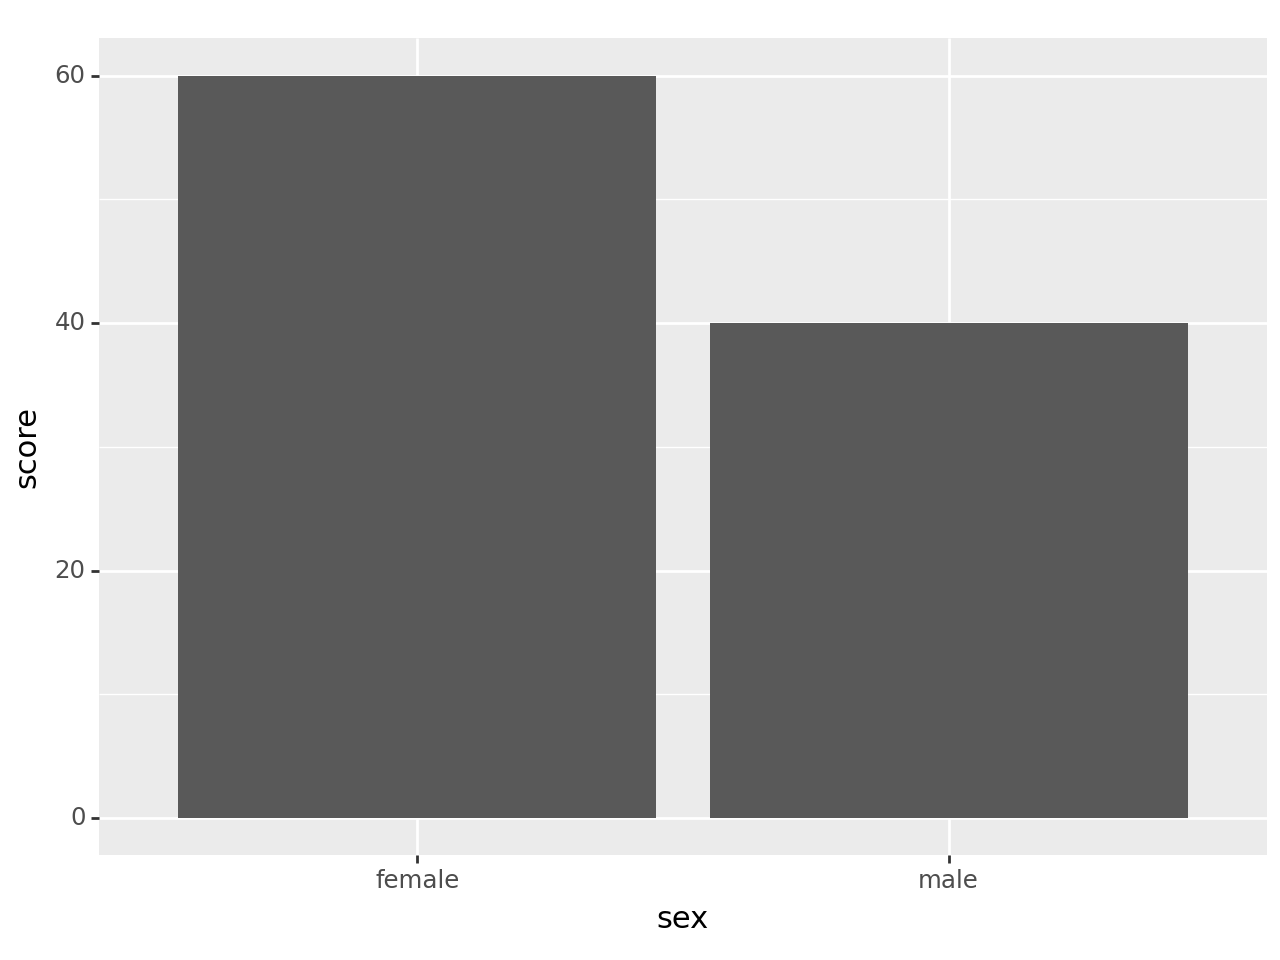

In [5]:
fig = ggplot(df)
col = geom_col(aes(x='sex',y='score'))
fig + col

`-` 예시3: 예시2에서 색깔로 구분하고 싶은 경우

In [6]:
df = pd.DataFrame({'sex':['male','female'],'score':[40,60]})
df

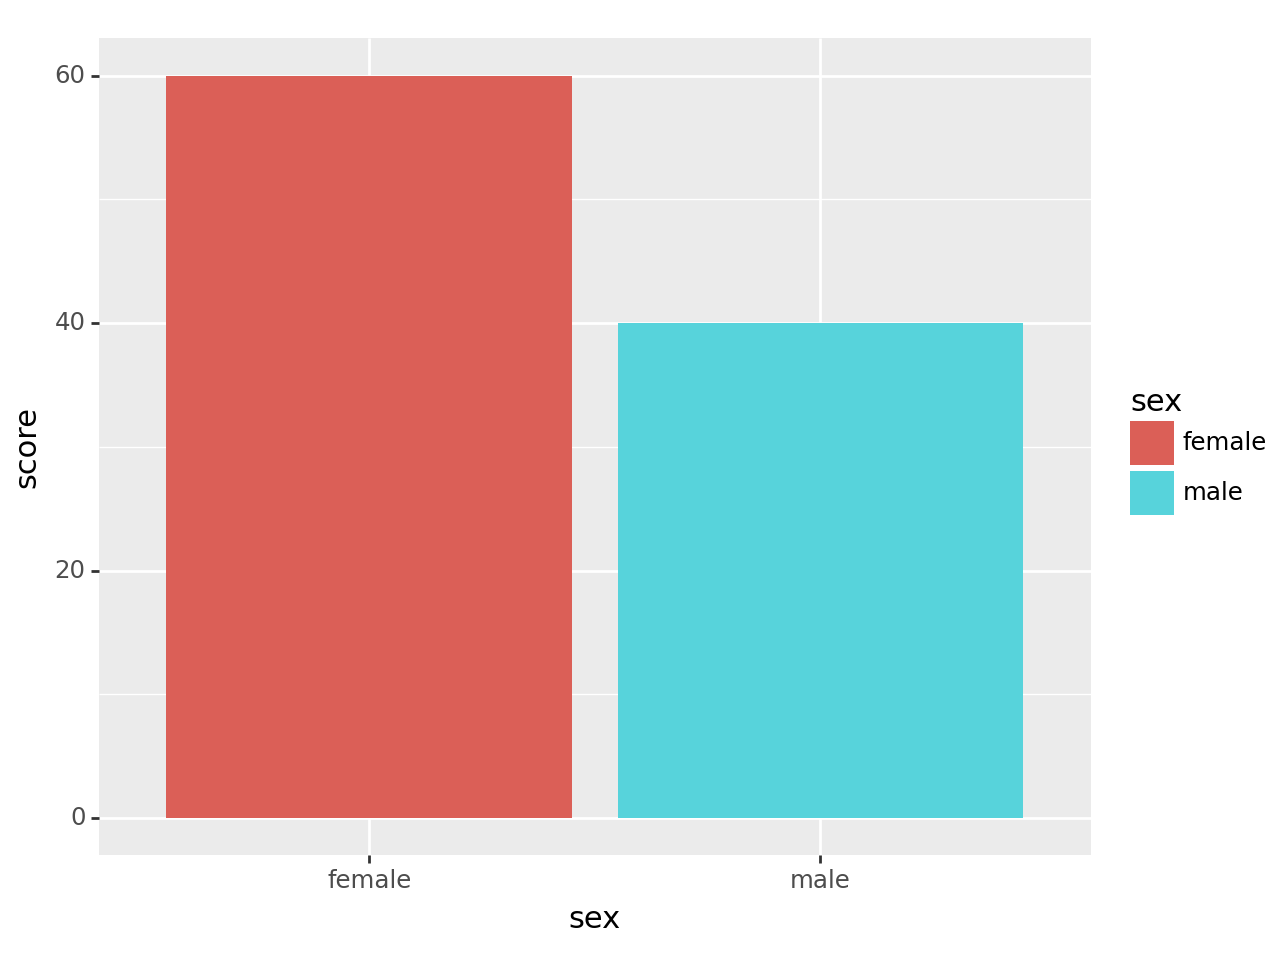

In [7]:
fig = ggplot(df)
col = geom_col(aes(x='sex',y='score',fill='sex'))
fig + col

`-` 예시4: 예시3에서 `scale_fill_manual()`을 이용하여 색상변경 하기

In [8]:
df = pd.DataFrame({'sex':['male','female'],'score':[40,60]})
df

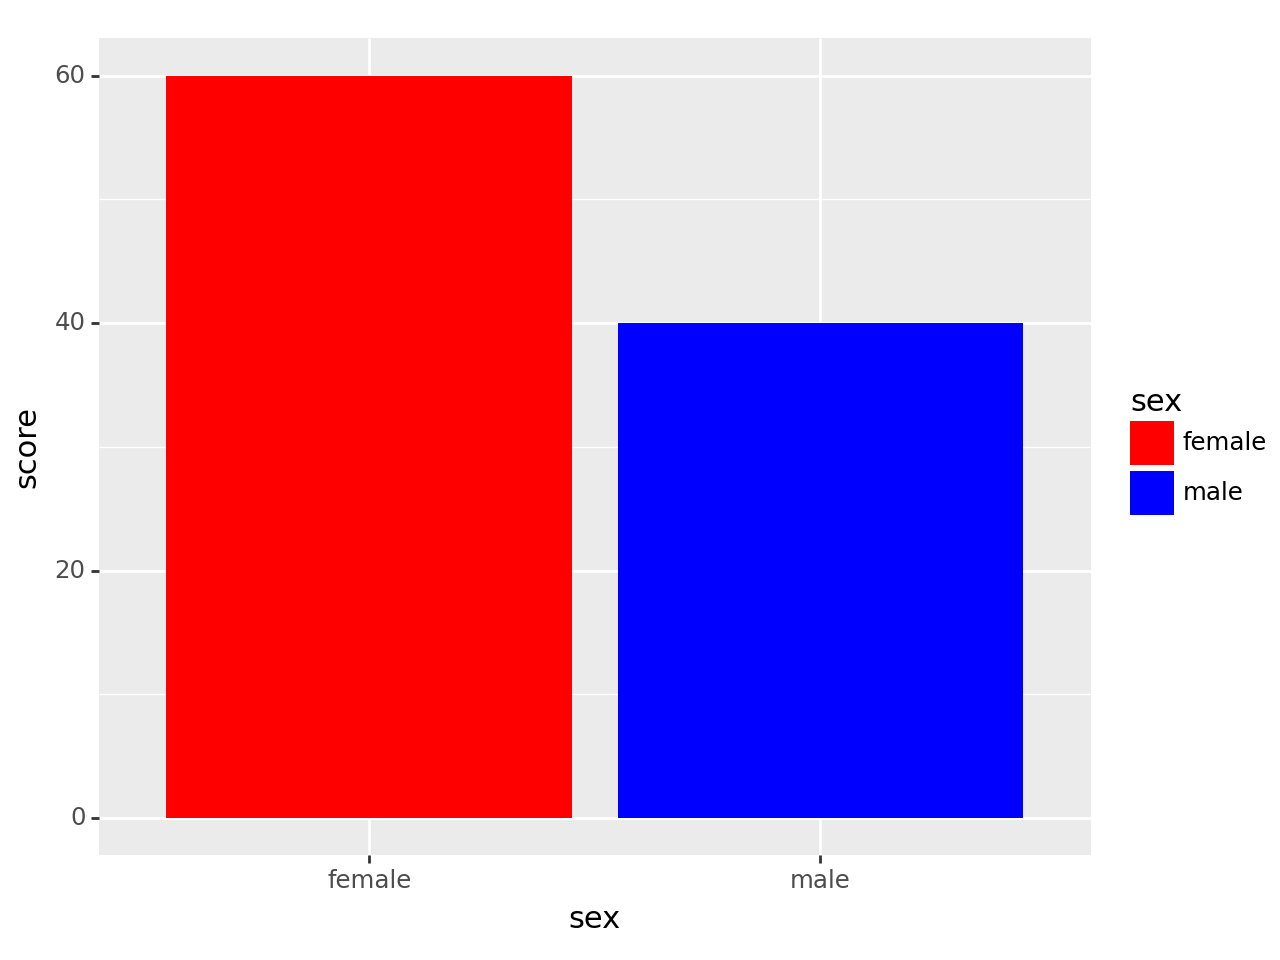

In [9]:
fig = ggplot(df)
col = geom_col(aes(x='sex',y='score',fill='sex'))
fig + col + scale_fill_manual(['red','blue'])

## B. `facet_wrap()`

`-` 예시1: `facet_wrap()`을 이용한 면분할 – 반별로 면분할

In [10]:
df = pd.DataFrame({'sex':['male','female','male','female'],'score':[40,60,50,20],'class':['A','A','B','B']})
df

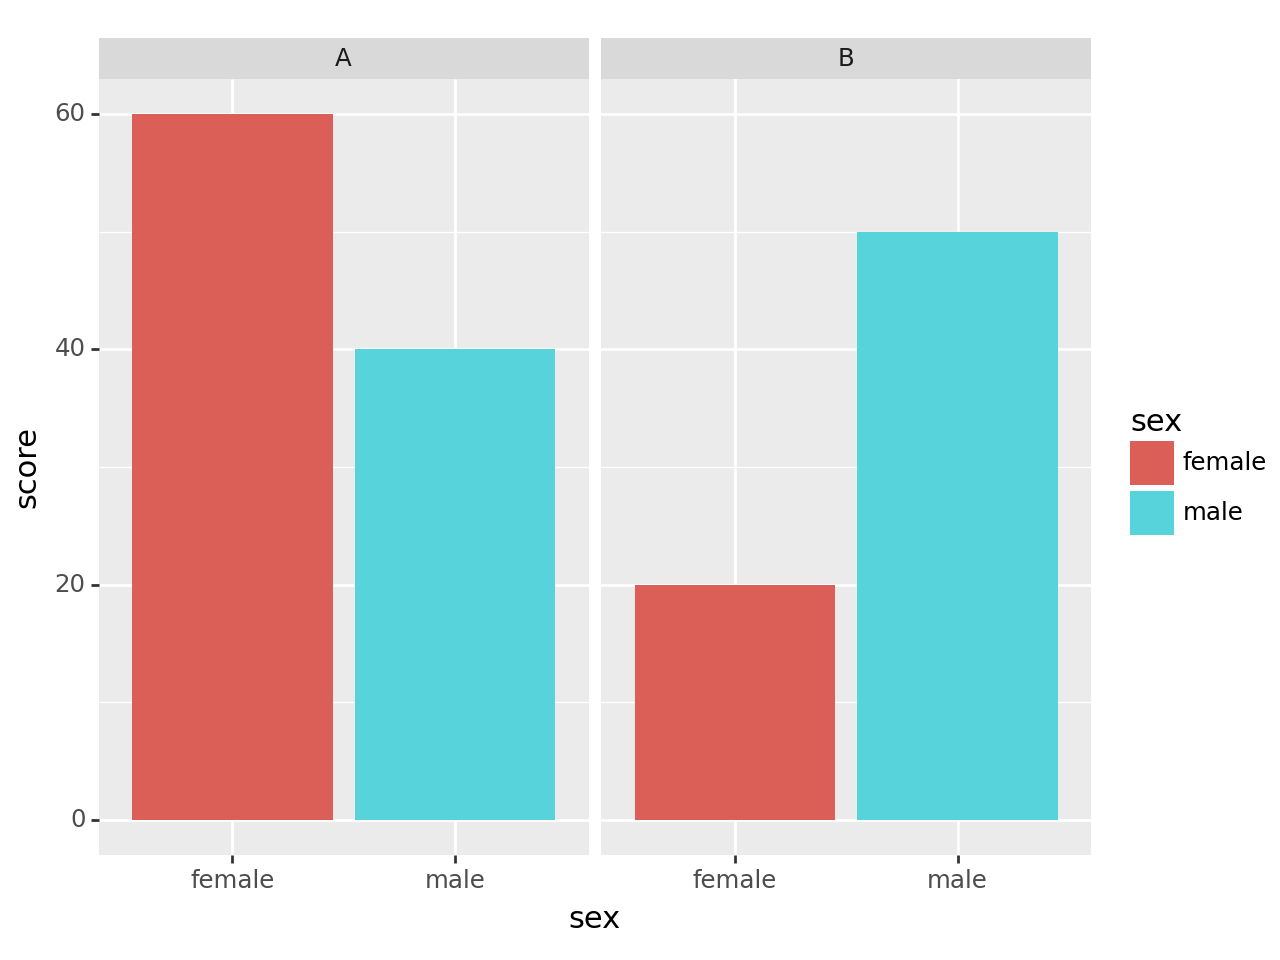

In [11]:
fig = ggplot(df)
col = geom_col(aes(x='sex',y='score',fill='sex')) 
fig + col + facet_wrap('class')

`-` 예시2: `facet_wrap()`을 이용한 면분할 – 성별로 면분할

In [12]:
df = pd.DataFrame({'sex':['male','female','male','female'],'score':[40,60,50,20],'class':['A','A','B','B']})
df

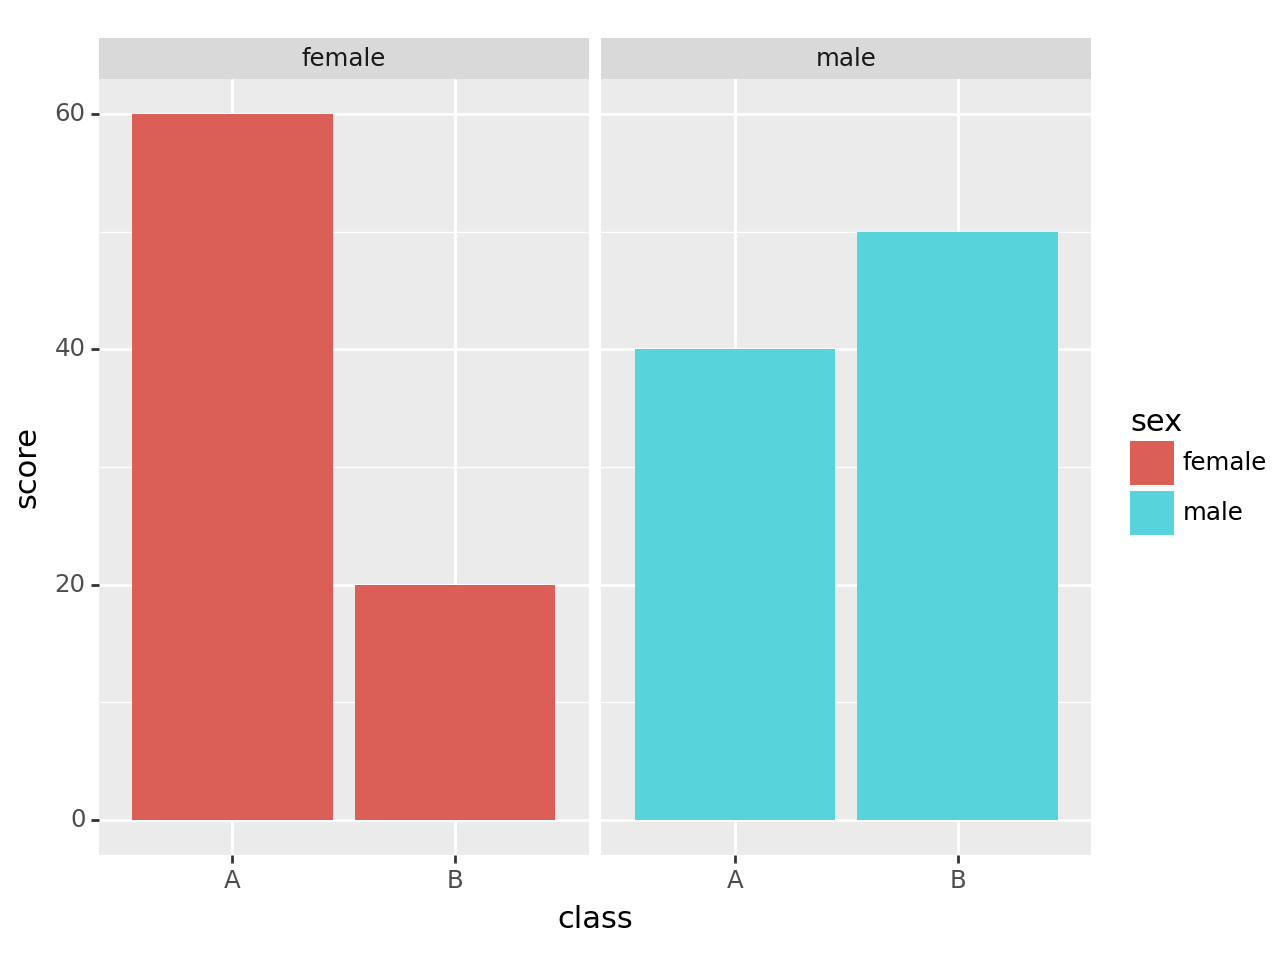

In [13]:
fig = ggplot(df)
col = geom_col(aes(x='class',y='score',fill='sex')) 
fig + col + facet_wrap('sex')

# 4. 심슨의 역설

`-` 버클리대학교의 입학데이터

-   <https://github.com/guebin/DV2023/blob/main/posts/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다.

-   1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬
    많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다.

In [14]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

## A. 시각화1: 전체합격률 시각화 – pandas 초보

`-` 여성지원자의 합격률

In [15]:
df.query('gender == "female" and result =="pass"')['count'].sum() / df.query('gender == "female"')['count'].sum()

`-` 남성지원자의 합격률

In [16]:
df.query('gender == "male" and result =="pass"')['count'].sum() / df.query('gender == "male"')['count'].sum()

`-` 시각화

In [17]:
tidydata = pd.DataFrame({'male':[0.5202526941657376],'female':[0.420708446866485]})
tidydata

-   이렇게 데이터 프레임을 만들면 망해요

In [18]:
tidydata = pd.DataFrame({'sex':['male','female'],'rate':[0.5202526941657376,0.420708446866485]})
tidydata

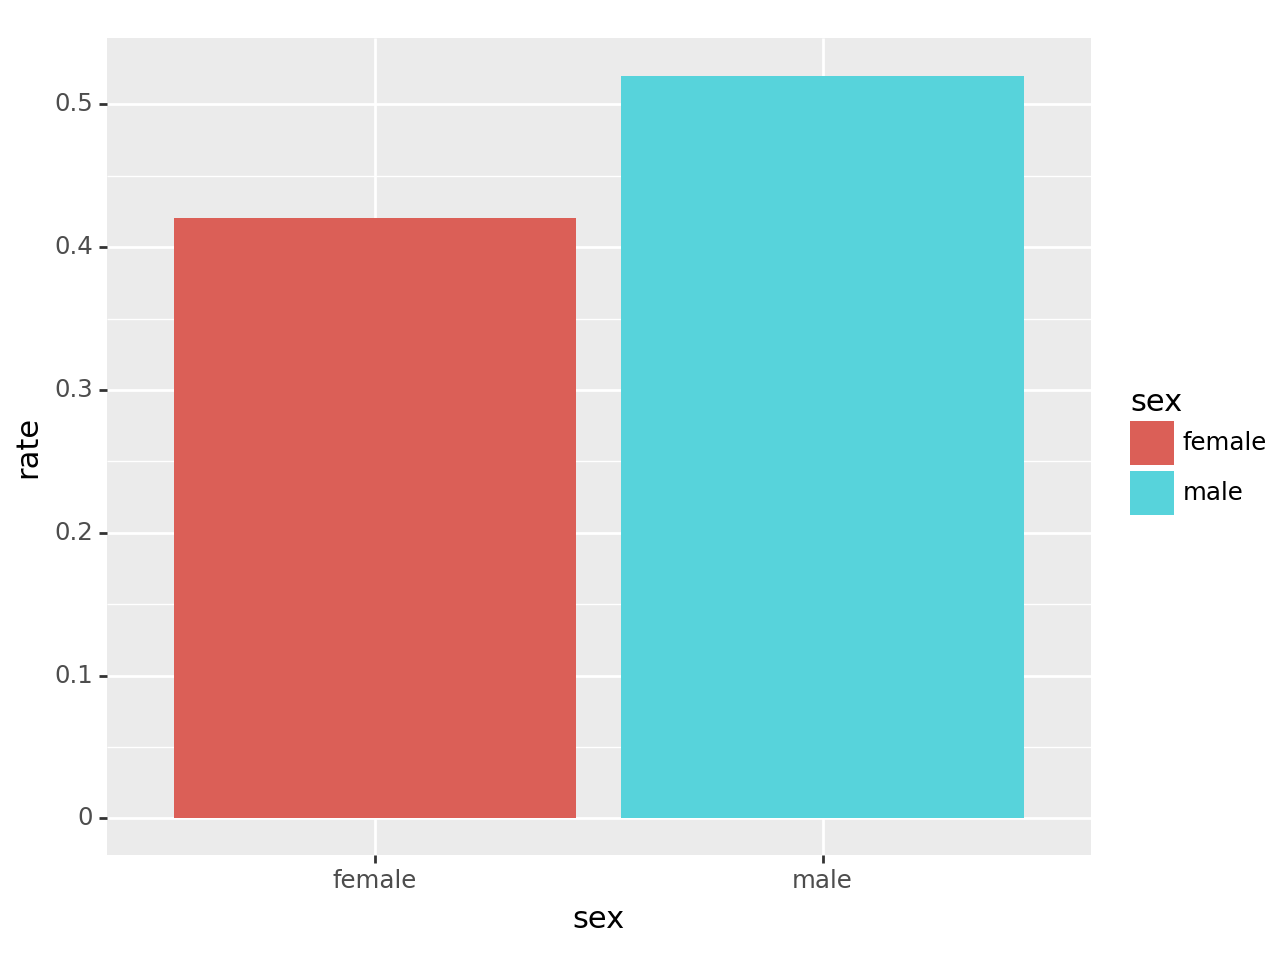

In [19]:
fig = ggplot(tidydata)
col = geom_col(aes(x='sex',y='rate',fill='sex'))
fig + col

## B. 시각화1: 전체합격률 시각화 – pandas 고수

In [20]:
df.pivot_table(index='gender', columns='result', values='count', aggfunc=sum)

/tmp/ipykernel_3693597/1414298521.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

In [21]:
df.pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(rate = lambda _df: _df['pass'] / (_df['fail'] + _df['pass']))\
.reset_index()

/tmp/ipykernel_3693597/3036569198.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/tmp/ipykernel_3693597/1840989269.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

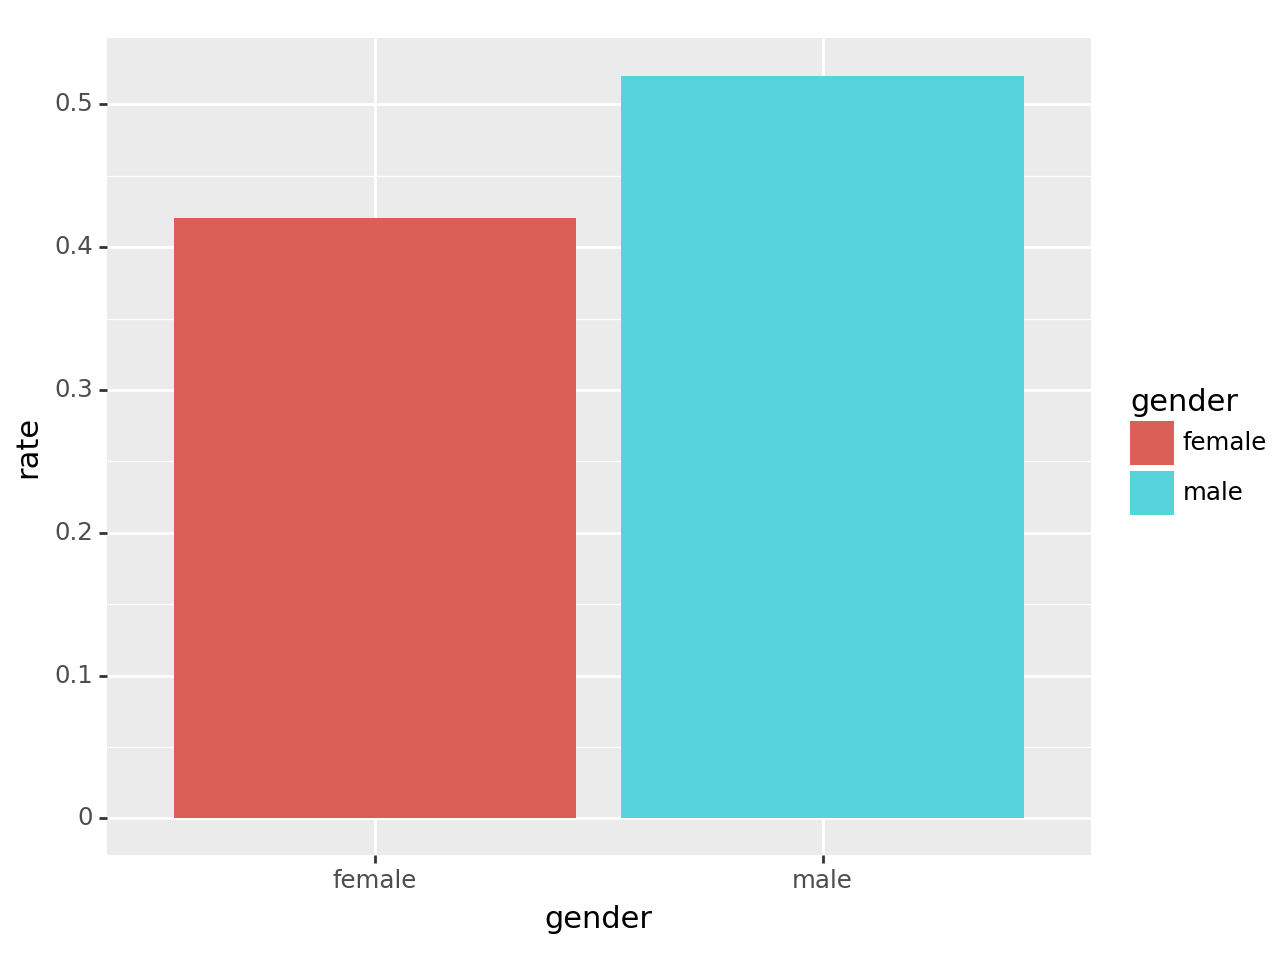

In [22]:
tidydata = df.pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(rate = lambda _df: _df['pass'] / (_df['fail'] + _df['pass']))\
.reset_index()

fig = ggplot(tidydata) 
col = geom_col(aes(x='gender',y='rate',fill='gender'))
fig + col 

# 5. HW

적당한 데이터프레임을 선언하고 아래와 같은 barplot을 그려라.

In [23]:
#